In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data pre-processing

In [5]:
global_temp = pd.read_csv("D:/Desktop/TSA/GlobalTemperatures.csv")
global_temp.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## Finding duplicates

global_temp.duplicated().sum()

0

This means we don't have any duplicate data.

In [7]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

--> dt must be 'date-time' datatype as it contains date-time values. 

In [8]:
global_temp['dt'][0]

'1750-01-01'

In [9]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])
global_temp['dt'].dtype

dtype('<M8[ns]')

In [10]:
global_temp['dt'][0]

Timestamp('1750-01-01 00:00:00')

Is there Global Warming?

In [11]:
global_temp['years']=global_temp['dt'].dt.year
global_temp.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [12]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [13]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

--> Maximum Uncertainty will be Avg temperature + deviation(Uncertainty)

--> whereas minimum Uncertainty will be Avg temp - deviation(Uncertainty)

--> and this deviation is Uncertainty

In [14]:
data['Uncertainty_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head(5)

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [15]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],
      dtype='object')

<AxesSubplot:xlabel='years'>

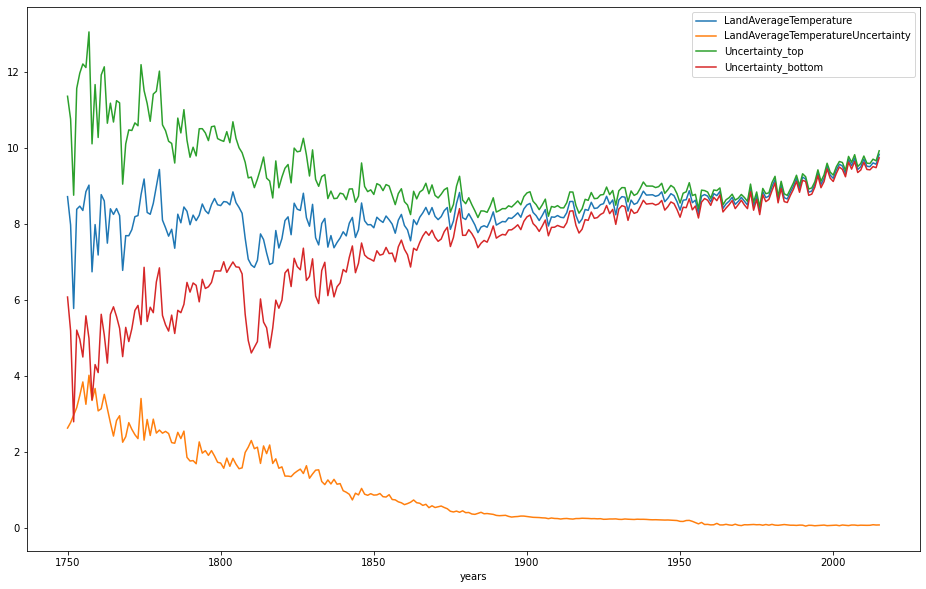

In [16]:
#lineplot

data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty','Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

Conclusion : From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has 
the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years!
This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last 
few years.

# Average Temperature in each season

In [17]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years'],
      dtype='object')

In [20]:
global_temp['month']=global_temp['dt'].dt.month
global_temp.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [21]:
global_temp['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [22]:
#extracting season from month

def get_season(month):
    
    if month>=3 and month<=5:
        return 'spring'
    
    elif month>=6 and month<=8:
        return 'summer'
    
    elif month>=9 and month<=11:
        return 'autumn'
    
    else:
        return 'winter'

In [24]:
global_temp['season']=global_temp['month'].apply(get_season)
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years', 'month',
       'season'],
      dtype='object')

In [26]:
years=global_temp['years'].unique()
years

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [27]:
global_temp['season'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [28]:
#defining list to store season temp

spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

for year in years:
    current_yr=global_temp[global_temp['years']==year]
    
    spring_temps.append(current_yr[current_yr['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season']=='winter']['LandAverageTemperature'].mean())

In [29]:
season=pd.DataFrame()

season['years']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

season

,years,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...,...
261,2011,9.190000,14.954667,10.026000,3.893333
262,2012,9.429667,14.762667,10.208000,3.629000
263,2013,9.166667,14.771000,10.278000,4.210333
264,2014,9.516333,14.694333,10.044667,4.027333


In [30]:
season.columns

Index(['years', 'spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps'],
      dtype='object')

In [31]:
season[['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps']]

,spring_temps,summer_temps,autumn_temps,winter_temps
0,8.563000,14.518333,8.890000,2.963000
1,6.735000,14.116000,10.673000,1.729000
2,7.035500,NaN,7.587000,2.717000
3,8.627333,14.608333,9.212333,1.104333
4,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...
261,9.190000,14.954667,10.026000,3.893333
262,9.429667,14.762667,10.208000,3.629000
263,9.166667,14.771000,10.278000,4.210333
264,9.516333,14.694333,10.044667,4.027333


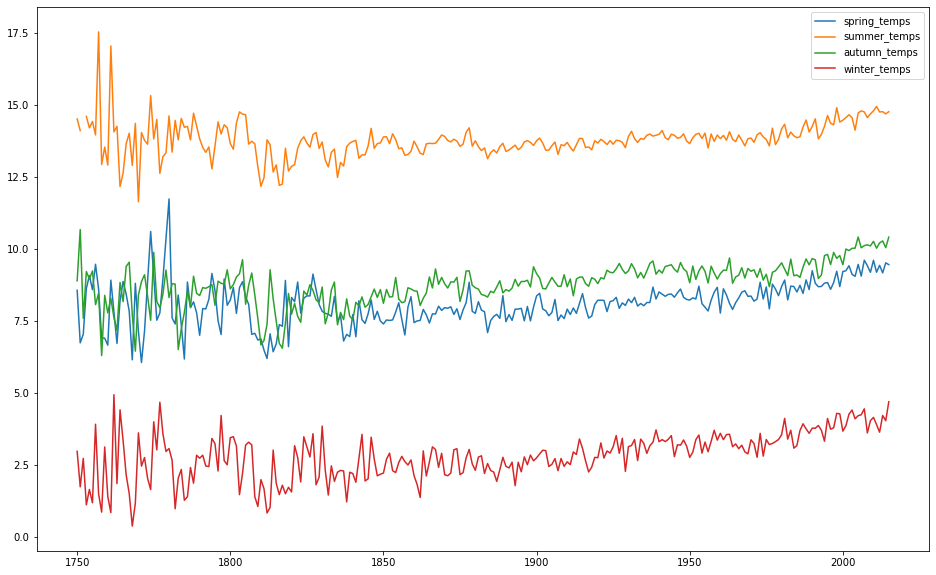

In [32]:
plt.figure(figsize=(16,10))
plt.plot(season['years'],season[['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps']])

plt.legend(['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'])

Is it getting warmer? Yes it is.

# Preparing Data for Time Series Modelling

In [33]:
cities = pd.read_csv("D:/Desktop/TSA/GlobalLandTemperaturesByCity.csv")
cities.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [35]:
cities.shape

(8599212, 7)

Sampling in data- Random Sampling

In [36]:
cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [40]:
india=cities[cities['Country']=='India']
india

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E
...,...,...,...,...,...,...,...
8385505,2013-05-01,29.286,0.516,Yelahanka,India,13.66N,76.79E
8385506,2013-06-01,25.401,0.400,Yelahanka,India,13.66N,76.79E
8385507,2013-07-01,24.232,0.323,Yelahanka,India,13.66N,76.79E
8385508,2013-08-01,24.493,0.366,Yelahanka,India,13.66N,76.79E


In [41]:
india['City'].unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [44]:
india_cities=['Kota','Indore','Delhi']

In [46]:
data2=india[india['City'].isin(india_cities)]
data2.shape

(7839, 7)

In [47]:
data2.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1938830,1796-01-01,14.590,2.374,Delhi,India,28.13N,77.27E
1938831,1796-02-01,17.109,1.940,Delhi,India,28.13N,77.27E
1938832,1796-03-01,21.454,2.608,Delhi,India,28.13N,77.27E
1938833,1796-04-01,28.715,2.122,Delhi,India,28.13N,77.27E
1938834,1796-05-01,33.726,1.997,Delhi,India,28.13N,77.27E


In [49]:
data2=data2[['dt','AverageTemperature']]
data2.head(5)

,dt,AverageTemperature
1938830,1796-01-01,14.590
1938831,1796-02-01,17.109
1938832,1796-03-01,21.454
1938833,1796-04-01,28.715
1938834,1796-05-01,33.726


In [50]:
data2.columns=['Date','Temp']
data2.head(3)

,Date,Temp
1938830,1796-01-01,14.590
1938831,1796-02-01,17.109
1938832,1796-03-01,21.454


In [52]:
data2['Date']=pd.to_datetime(data2['Date'])
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [53]:
#total missing values
data2.isnull().sum()

Date      0
Temp    487
dtype: int64

In [55]:
#dropping missing values

data2.dropna(inplace=True)
data2.head(5)

,Date,Temp
1938830,1796-01-01,14.590
1938831,1796-02-01,17.109
1938832,1796-03-01,21.454
1938833,1796-04-01,28.715
1938834,1796-05-01,33.726


# Finding Seasonality factor in data

We will try to convert our seasonal data into stationary bcz Time Series algos works phenomenal with stationary data.

Lets understand what is seasoanlity ,stationary & couple of Time series Terms.

Seasonality ->> When mean & variance is not constant throughout the data , i.e. data has a trend here.

Stationary data ->>  so data that has no trend i.e. that has constant mean & std dev throughout data.

If not stationary, then we have to make it stationary using various manipulations.

Seasonality is opposite of stationary ,i.e. a time series with a clear seasonal component is referred to as non-stationary.
i.e. the goal is we have to convert seasonal data into stationary data..

    a)Visualisation approach
(seasonality is all about suppose in each yr in christmas sales goes up) and then down ,i.e. this is a cycle that repeats 
over time, such as monthly or yearly. 

   There are many types of seasonality; 
   for example:

Time of Day.
Daily.
Weekly.
Monthly.
Yearly.
Once seasonality is identified, it can be removed

The model of seasonality can be removed from the time series. 
This process is called Seasonal Adjustment, or Deseasonalizing.
A time series where the seasonal component has been removed is called seasonal stationary.
A time series with a clear seasonal component is referred to as non-stationary.

In [62]:
data2['year']=data2.index.year
data2['month']=data2.index.month
data2.head(5)

,Temp,year,month
Date,,,
1796-01-01,14.590,1796,1
1796-02-01,17.109,1796,2
1796-03-01,21.454,1796,3
1796-04-01,28.715,1796,4
1796-05-01,33.726,1796,5


In [64]:
#pivot table

pivot=data2.pivot_table(values='Temp',index='month',columns='year')
pivot

year,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,16.548000,NaN,16.773000,16.130333,16.533333,16.913333,17.437333,14.914000,16.758667,16.658000,...,16.521667,16.064333,17.541667,17.140667,16.211000,18.432667,16.381333,15.478667,15.447667,15.748667
2,18.966667,NaN,19.212667,17.658333,19.596667,18.638667,19.478667,17.941333,18.708000,18.769667,...,20.236667,19.588333,23.380333,20.351333,18.028000,21.479667,20.705000,20.019333,18.880000,19.470000
3,23.046000,23.579667,25.222333,23.802000,23.656000,25.874333,25.590667,24.050000,23.930333,24.760333,...,27.744333,25.844000,24.350000,24.635667,26.782000,26.403333,28.020000,25.520667,25.011667,25.108000
4,29.809667,28.964333,NaN,30.657667,31.048667,NaN,30.357333,30.923000,31.773667,29.677000,...,32.292333,30.001667,31.011000,31.944667,30.353667,30.942000,33.046000,30.062333,30.632667,30.096000
5,34.020333,33.207667,NaN,34.178000,33.305333,NaN,33.135667,34.299667,34.638667,33.966667,...,34.221000,33.865333,34.651000,34.329667,33.160000,34.758667,36.093000,34.689667,34.353000,35.000000
6,33.139333,33.538333,32.992667,33.604667,32.995000,32.340333,34.102333,33.342333,33.596333,33.637667,...,32.520333,34.352333,32.537000,33.400333,30.441667,34.497667,34.384333,32.004333,34.400000,31.477333
7,29.200333,29.135667,30.264667,29.631667,28.849333,29.670333,30.108000,30.207667,30.971667,29.454667,...,30.716000,28.990000,29.194000,29.376333,29.112667,29.912000,29.926000,29.058667,30.091667,28.542667
8,28.244333,28.143000,28.624000,28.207667,27.591333,27.453000,28.114667,29.336333,28.334333,28.839667,...,27.732000,28.881333,27.762000,28.499333,27.935667,29.249000,28.364667,28.122667,27.739667,27.744667
9,27.795667,27.888667,27.735000,27.970667,26.764000,27.418000,28.353000,28.500333,28.290000,27.771667,...,29.327667,28.332667,28.648667,28.669000,28.168000,29.459000,27.740333,27.933333,28.254333,NaN


Text(0, 0.5, 'Temperatures')

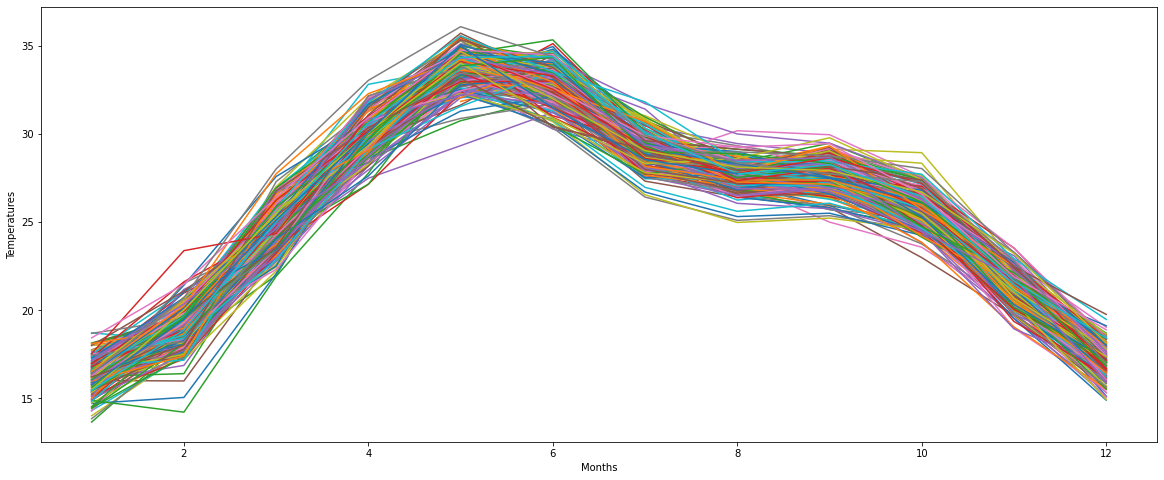

In [65]:
pivot.plot(figsize=(20,8))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

Looking at this graph, we can conclude that there is seasonality in data.
The higher temperatures are around b/w June-August and the lower are between 
December-Feb

# Finding if Data is stationary or not

<AxesSubplot:xlabel='Date'>

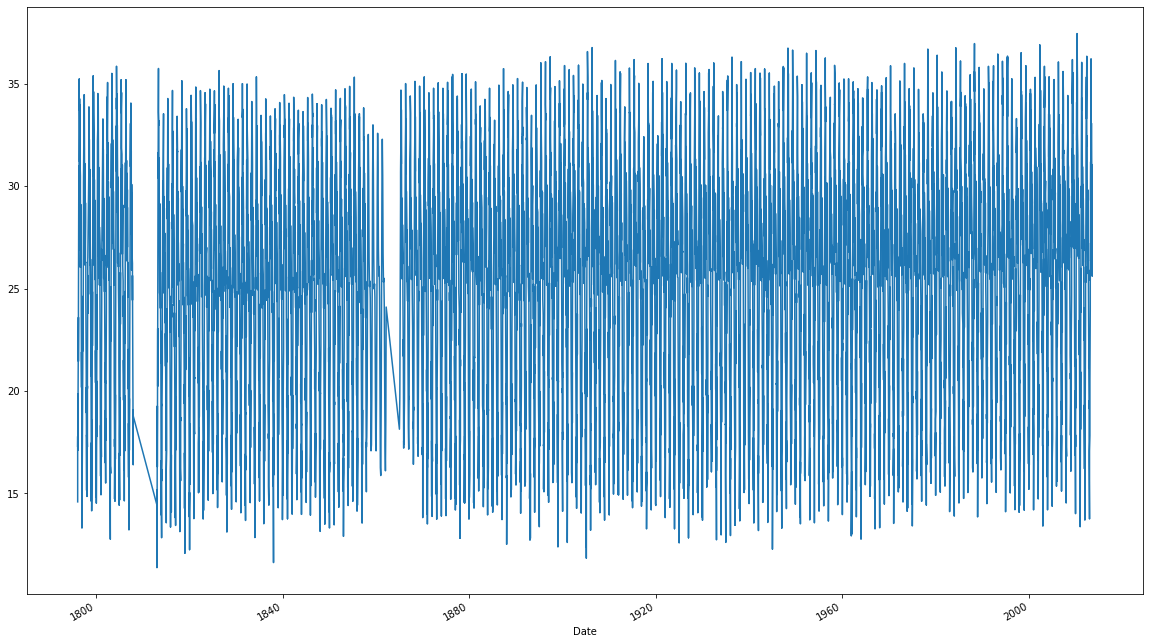

In [69]:
#using data visualisation (lineplot to find out what's a trend of data)

data2['Temp'].plot(figsize=(20,12))

The spread of the data indicates that there is a significant variation in the data. 
To flatten the growing variance, we need to transform the data.

# Making Data Stationary

In [72]:
data2['Temp'].head(10)

Date
1796-01-01    14.590
1796-02-01    17.109
1796-03-01    21.454
1796-04-01    28.715
1796-05-01    33.726
1796-06-01    34.264
1796-07-01    31.321
1796-08-01    30.501
1796-09-01    29.103
1796-10-01    26.091
Name: Temp, dtype: float64

In [74]:
data2['Temp'].shift(3).head(10)

Date
1796-01-01       NaN
1796-02-01       NaN
1796-03-01       NaN
1796-04-01    14.590
1796-05-01    17.109
1796-06-01    21.454
1796-07-01    28.715
1796-08-01    33.726
1796-09-01    34.264
1796-10-01    31.321
Name: Temp, dtype: float64

In [76]:
data2['first_temp_diff']=data2['Temp'] - data2['Temp'].shift(12)   
#shift(12) , bcz year has 12 month cycle , i.e. in order to remove seasonal component.

In [77]:
data2.head(13)

,Temp,year,month,first_temp_diff
Date,,,,
1796-01-01,14.590,1796,1,NaN
1796-02-01,17.109,1796,2,NaN
1796-03-01,21.454,1796,3,NaN
1796-04-01,28.715,1796,4,NaN
1796-05-01,33.726,1796,5,NaN
1796-06-01,34.264,1796,6,NaN
1796-07-01,31.321,1796,7,NaN
1796-08-01,30.501,1796,8,NaN
1796-09-01,29.103,1796,9,NaN


<AxesSubplot:xlabel='Date'>

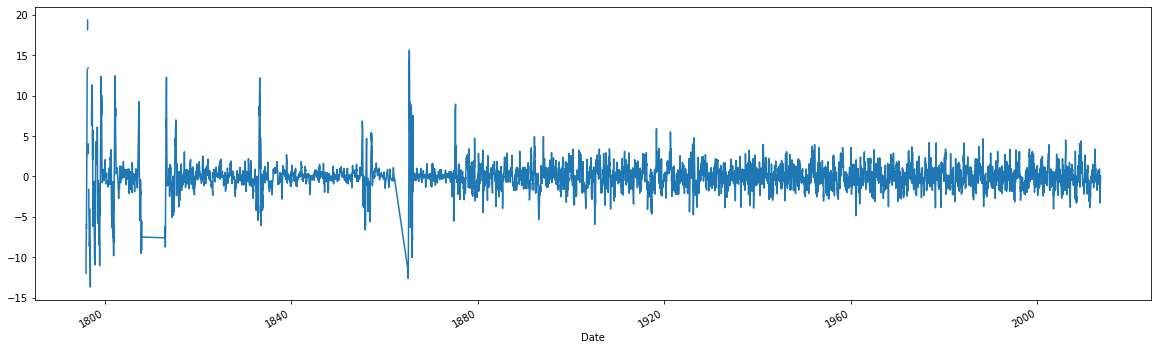

In [78]:
data2['first_temp_diff'].plot(figsize=(20,6))

# Building Time Series Model

Lets Build a basic moving Avg model 

In [83]:
df=data2[['first_temp_diff']]

In [81]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [82]:
df.dropna(inplace=True)

In [84]:
df.head(10)

,first_temp_diff
Date,
1796-01-01,NaN
1796-02-01,NaN
1796-03-01,NaN
1796-04-01,NaN
1796-05-01,NaN
1796-06-01,NaN
1796-07-01,NaN
1796-08-01,NaN
1796-09-01,NaN


In [87]:
# Smoothening series using moving average
df['Predictions']=df['first_temp_diff'].rolling(window=5).mean()
df.head(2)

,first_temp_diff,Predictions
Date,,
1796-01-01,NaN,NaN
1796-02-01,NaN,NaN


In [88]:
df.dropna(inplace=True)
df.head(3)

,first_temp_diff,Predictions
Date,,
1797-07-01,-2.623,6.4902
1797-08-01,-4.119,4.1920
1797-09-01,-2.145,1.6332


In [89]:
df.columns=['actual_temp','forecast_temp']
df.head(5)

,actual_temp,forecast_temp
Date,,
1797-07-01,-2.623,6.4902
1797-08-01,-4.119,4.1920
1797-09-01,-2.145,1.6332
1797-10-01,-4.850,-1.6010
1797-11-01,-10.153,-4.7780


In [90]:
#checking accuracy of the model
from sklearn.metrics import mean_squared_error

In [91]:
np.sqrt(mean_squared_error(df['actual_temp'],df['forecast_temp']))

1.5954158502175566